<a href="https://colab.research.google.com/github/kumarsinghashu/AirBnb--Booking--Analysis/blob/main/AirBnb_Booking_Analysis_Capstone_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b/>Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
#This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values</b>


#<b/>Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?</b>

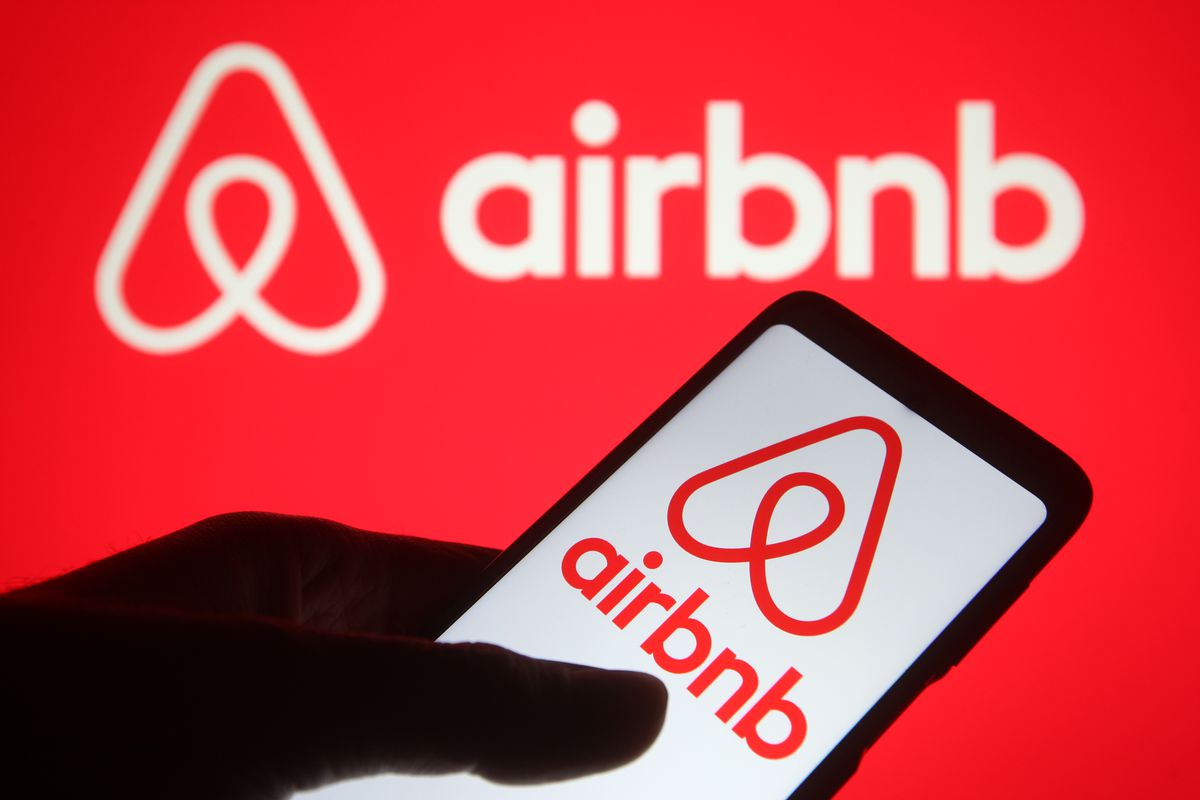

#<b/>Describing Hypothetical Situation</b>

 A hypothetical situation for conducting an exploratory data analysis (EDA) on Airbnb bookings.

Scenario:
 Work for a data analytics firm that specializes in providing insights to Airbnb hosts to optimize their property listings in a particular city, let's say New York City. Your company has acquired a dataset containing information about Airbnb bookings in NYC over the past few years.

Hypothetical Objective:
Our task is to perform an Exploratory Data Analysis (EDA) on this dataset to provide valuable insights and trends to the company's clients (Airbnb hosts) aiming to improve their listings' performance.

Dataset Overview:
The dataset includes various attributes such as:
- Listing information: property type, neighborhood, number of bedrooms/bathrooms, amenities, etc.
- Booking details: booking price, minimum nights, availability, number of reviews, etc.
- Temporal information: booking dates, availability calendar, seasonality, etc.

Hypothesis to Investigate:
1. Seasonal Trends: Explore how the prices and demand for Airbnb listings vary across different seasons in NYC. Are there specific months or seasons with higher booking rates or prices?
2. Neighborhood Analysis: Identify popular neighborhoods in NYC based on booking frequency, average prices, and customer reviews.
3. Pricing Factors: Investigate the factors influencing the pricing of Airbnb listings. Do factors like property type, location, amenities, or minimum nights affect the pricing significantly?
4. Review Analysis: Analyze the correlation between the number of reviews, review scores, and booking frequency. Do higher review scores result in more bookings?





#<b/>Let's Begin!</b>

#<b/>Importing essential libraries</b>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
#For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (11, 8)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#<b/>Mounting Drive</b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<b/>Load AirBnb Dataset</b>

In [3]:
AirBnb_df = pd.read_csv('/content/drive/MyDrive/AirBnb Bookings Analysis  EDA/Airbnb NYC 2019.csv')

#<b/>Knowing the Data</b>

In [4]:
# Inspecting the shape of Data
AirBnb_df.shape

(48895, 16)

In [5]:
# Looking top rows
AirBnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# Looking bottom rows
AirBnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
# Infromation about Dataset
AirBnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#<b/>About the Dataset – Airbnb Bookings</b>
This Airbnb dataset contains nearly 49,000 observations from New York , with 16 columns of data.

The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

This dataset contains information about Airbnb bookings in New York City in 2019. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the NYC.

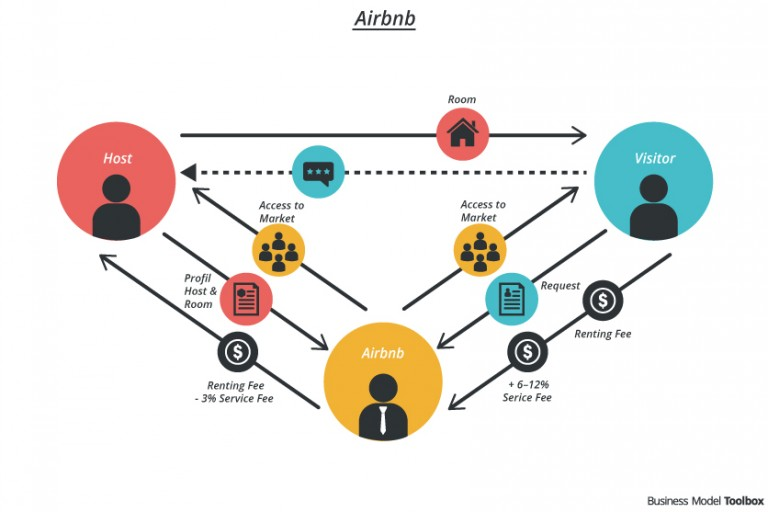

#<b/>Understanding the given variables</b>
id : a unique id identifying an airbnb lisitng name : name representing the accommodation

host_id : a unique id identifying an airbnb host

host_name : name under whom host is registered

neighbourhood_group : a group of area

neighbourhood : area falls under neighbourhood_group

latitude : coordinate of listing

longitude : coordinate of listing

room_type : type to categorize listing rooms

price : price of listing

minimum_nights : the minimum nights required to stay in a single visit


number_of_reviews : total count of reviews given by visitors

last_review : date of last review given

reviews_per_month : rate of reviews given per month

calculated_host_listings_count : total no of listing registered under the host

availability_365 : the number of days for which a host is available in a year.

In [8]:
#Looking duplicate values
AirBnb_df.duplicated().sum()

0

**No duplicate values are present in dataset.**

In [9]:
# Dropping unnecessary columns
AirBnb_df.drop(['latitude','longitude','last_review','reviews_per_month'],axis=1,inplace=True)

In [10]:
# Checking null values
AirBnb_df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

**There are null value in dataset.**

In [11]:
#Deleting the observations with null values
AirBnb_df.dropna(inplace=True)

In [12]:
#Confirming null values deletion
AirBnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**There are no null values are present in dataset.**

In [13]:
#Catching a statistical summary of the dataframe
AirBnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


Here we can see that there are price values which are 0. This doesn't make sense because I don't think so people would put up listing for free. We will impute values for these wrong observations.

In [14]:
#Getting values that have price as 0
AirBnb_df[AirBnb_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,6,333


In [15]:
# Checking the shape price = 0
AirBnb_df[AirBnb_df['price']==0].shape

(11, 12)

So here we find that there have 11 observations which price is 0 , so here we need to act towards. We will achieve this by imputing values based on minimum number of nights and their average price.

In [16]:
#Executing groupby to find the average price for different minimum number of nights
AirBnb_df.groupby('minimum_nights')['price'].mean().reset_index()

,minimum_nights,price
0,1,142.062756
1,2,146.279374
2,3,160.285643
3,4,161.229603
4,5,157.263765
...,...,...
103,400,50.000000
104,480,199.000000
105,500,88.800000
106,999,96.000000


In [17]:
#function for imputing average value of price wherever price is 0
def price_imputer(min_nights_list,airbnb_df):
  for i in min_nights_list:
    avg_val = AirBnb_df[AirBnb_df['minimum_nights']==i].groupby('minimum_nights')['price'].mean().reset_index().loc[0][1]
    AirBnb_df['price']=np.where((AirBnb_df['price']==0)&(AirBnb_df['minimum_nights']==i),avg_val,AirBnb_df['price'])


In [18]:
#Calling the function to impute price values
min_nights_list = [1,2,3,4,5,30]
price_imputer(min_nights_list,AirBnb_df)

In [19]:
#Checking if the imputation was success
AirBnb_df[AirBnb_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365


**So, here we can see that there are no more observations that have the value for price as 0.**

#<b/>Correlation Plot</b>

**A correlation matrix is a table that shows the correlation coefficients between variables. Each cell in the matrix represents the correlation between two variables, where the values range between -1 to 1.**

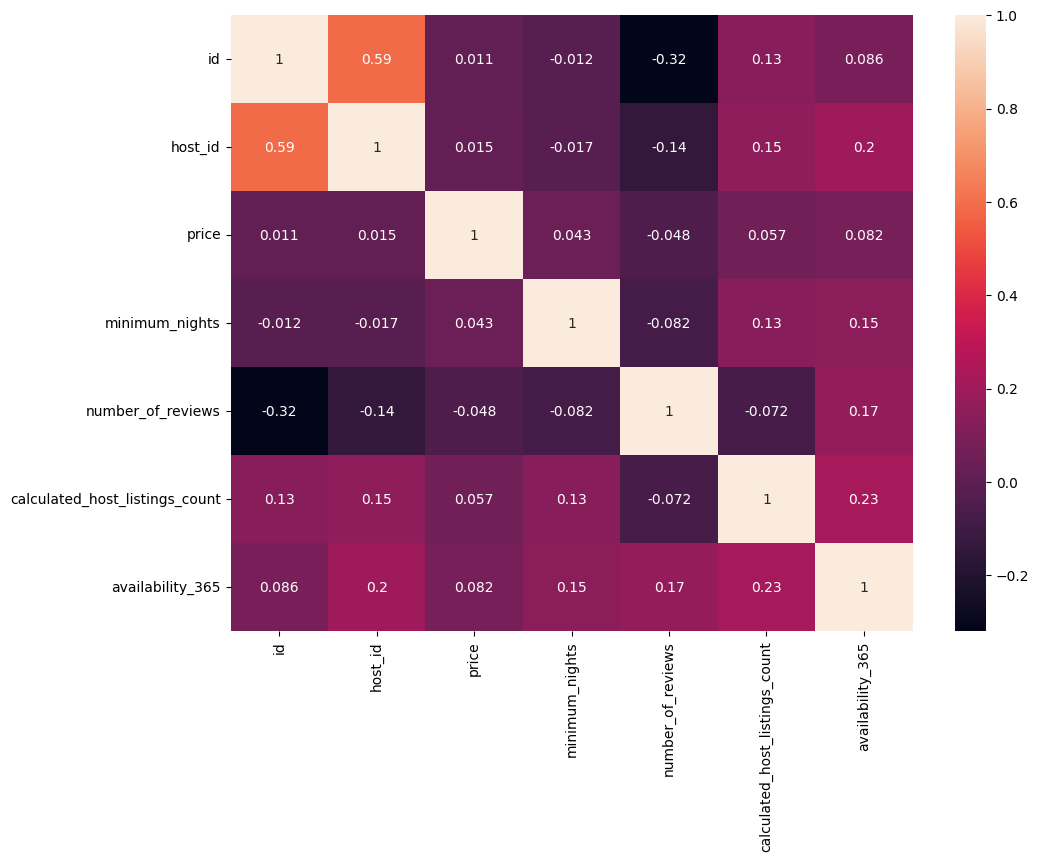

In [20]:
#Plotting the correlation matrix
 #Creating a correlation matrix
corr_matrix = AirBnb_df.corr()
#Using heatmap to represent the correlation
sns.heatmap(corr_matrix,annot=True)
#Displaying the visualization
plt.show()

As we can see here that there is no distinctive correlation between any variables(columns) here.

We will be removing id and host_id since it is a unique id representing the listing and the host respectively

In [21]:
#Removing unnecessary columns
main_colmn = set(AirBnb_df.columns) - {'id','host_id'}


In [22]:
#Taking numerical columns that add value to visualisations.
num_colmn = AirBnb_df[main_colmn].describe().columns.tolist()

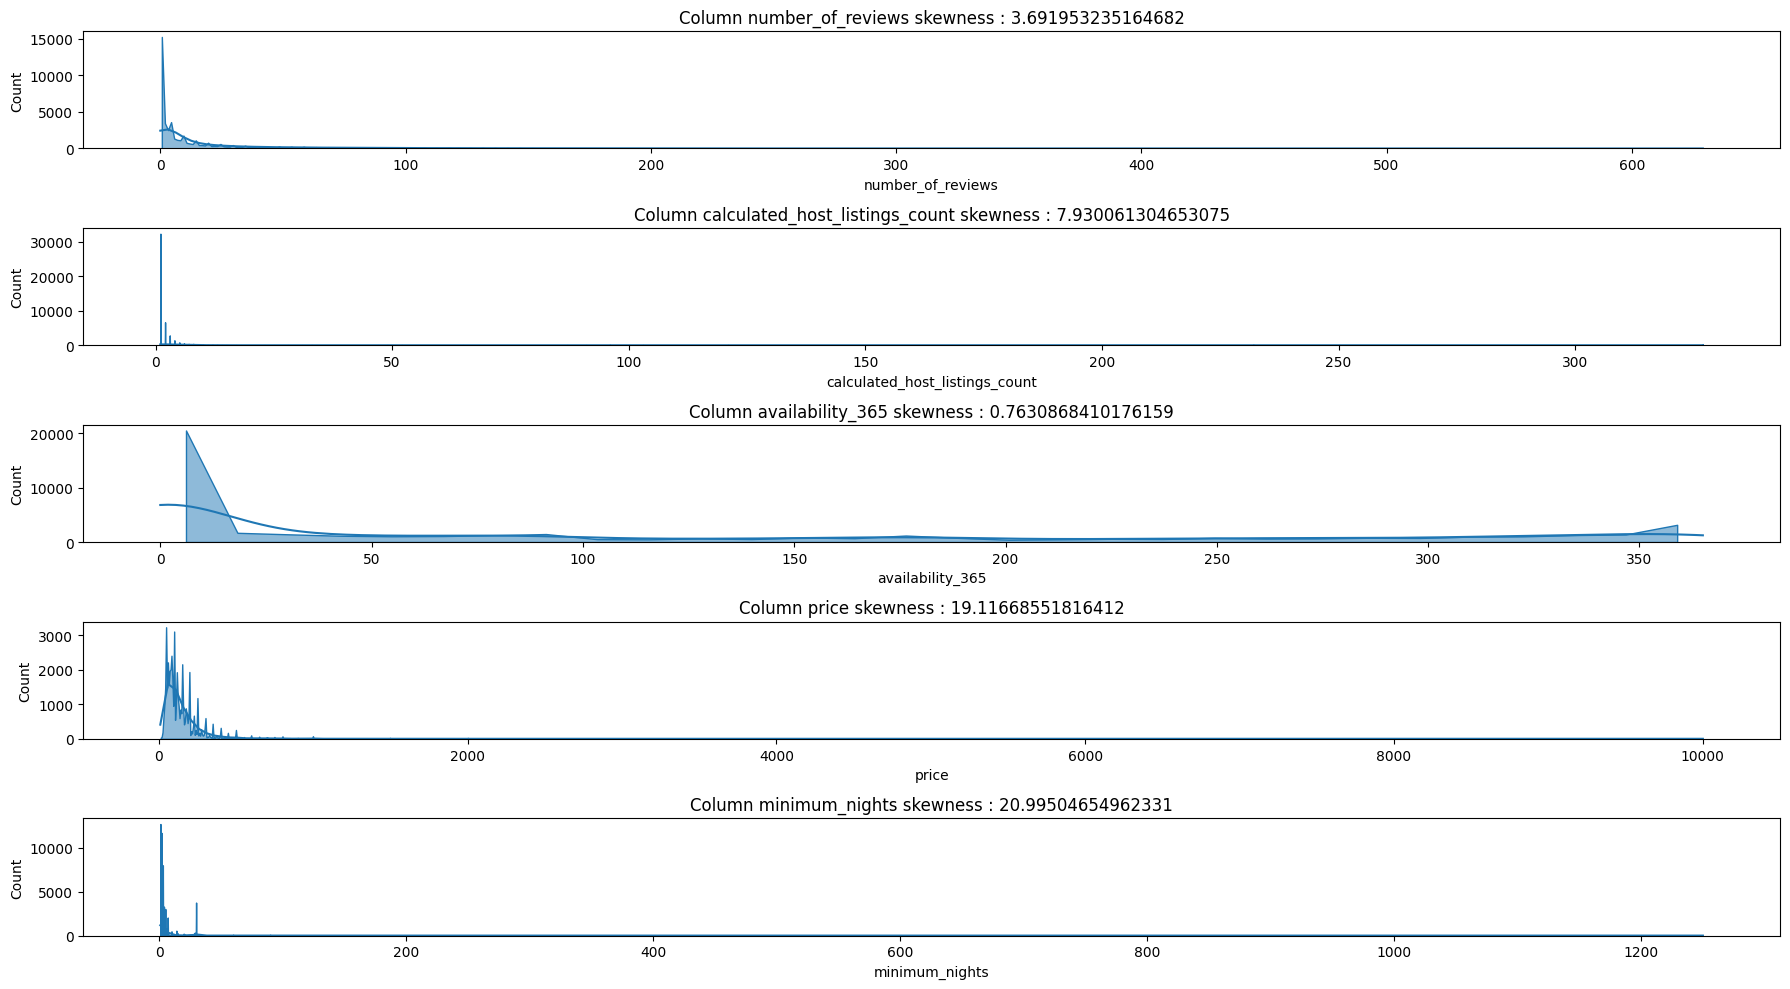

In [23]:
#Plotting important visualizations to see the skewness and distribution of each variable.
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(18, 10))
axes = axes.flatten()
for col, ax in zip(num_colmn, axes):
    sns.histplot(x=col, data=AirBnb_df, ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {AirBnb_df[col].skew()}')

plt.tight_layout(h_pad=1, w_pad=0.8)

**The data indicates that most variables are positively skewed, suggesting a general abundance of available listings year-round. Specifically, availability follows a uniform distribution, signifying consistent availability across different types of listings. Additionally, there appears to be a notable increase in availability counts from the end of the year to the beginning, indicating a rise in listings during this period.**

#<b/>Question 1: Which hosts are the busiest and why.
ANSWER:</b>

In [24]:
#creating a new busiest hosts dataframe with groupby operations on columns that I think cause a host to be busy.
busiest_hosts = AirBnb_df.groupby(['host_id','host_name','room_type','calculated_host_listings_count'])[['price','number_of_reviews','availability_365']].max().reset_index().sort_values(by=['number_of_reviews','price','availability_365'], ascending=False).head()
#Outlook of the busiest hosts dataframe.
busiest_hosts

,host_id,host_name,room_type,calculated_host_listings_count,price,number_of_reviews,availability_365
24474,47621202,Dona,Private room,2,47.0,629,333
7706,4734398,Jj,Private room,3,49.0,607,342
22203,37312959,Maya,Private room,5,46.0,543,175
4589,2369681,Carol,Private room,1,99.0,540,179
19436,26432133,Danielle,Private room,5,54.0,510,347


In [25]:
#Outlook of the busiest hosts dataframe.
busiest_hosts

,host_id,host_name,room_type,calculated_host_listings_count,price,number_of_reviews,availability_365
24474,47621202,Dona,Private room,2,47.0,629,333
7706,4734398,Jj,Private room,3,49.0,607,342
22203,37312959,Maya,Private room,5,46.0,543,175
4589,2369681,Carol,Private room,1,99.0,540,179
19436,26432133,Danielle,Private room,5,54.0,510,347


In [26]:
check_list=['price','number_of_reviews','availability_365']


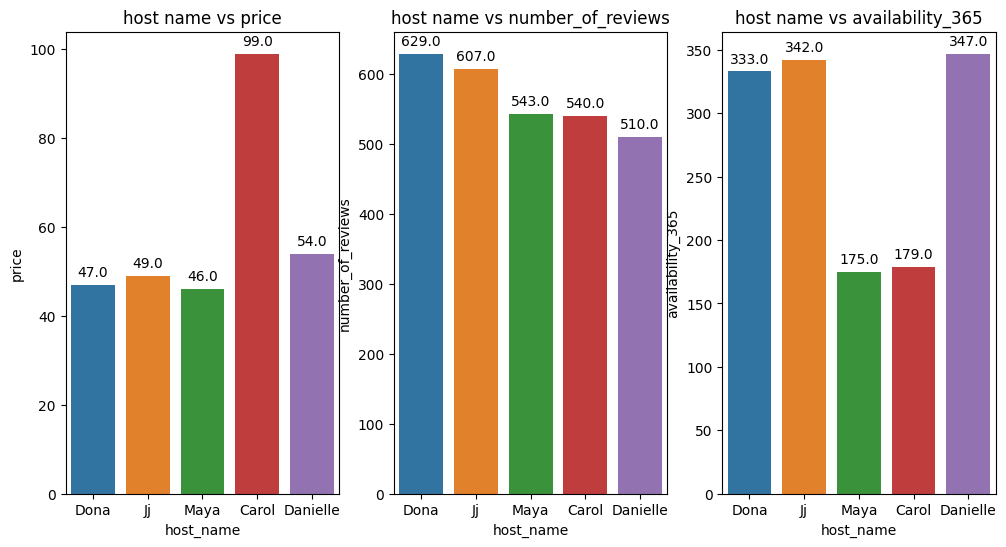

In [29]:
#Plotting the visualizations for Question 1
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,6))
axes.flatten()
for col,ax in zip(check_list,axes):
  splot= sns.barplot(data=busiest_hosts,x='host_name',y=col,ax=ax)
  for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
  ax.set_title(f'host name vs {col}')

The visual representations indicate a strong correlation between a host's popularity and the quantity of reviews they receive. While variables such as price and availability contribute to a host's popularity, the most consistent indicator is the number of reviews.

This analysis reveals the ranking of the busiest hosts as follows:

1) Dona

2) JJ

3) Maya

4) Carol

5) Danielle

These hosts exhibit a balanced combination of factors: moderately priced accommodations (approximately $60), reasonable availability (around six months), and a substantial number of reviews (around 550). This well-rounded blend contributes significantly to their popularity among guests.

#<b/>Question 2: For which location do the customers pay the highest and lowest rent.
ANSWER:</b>

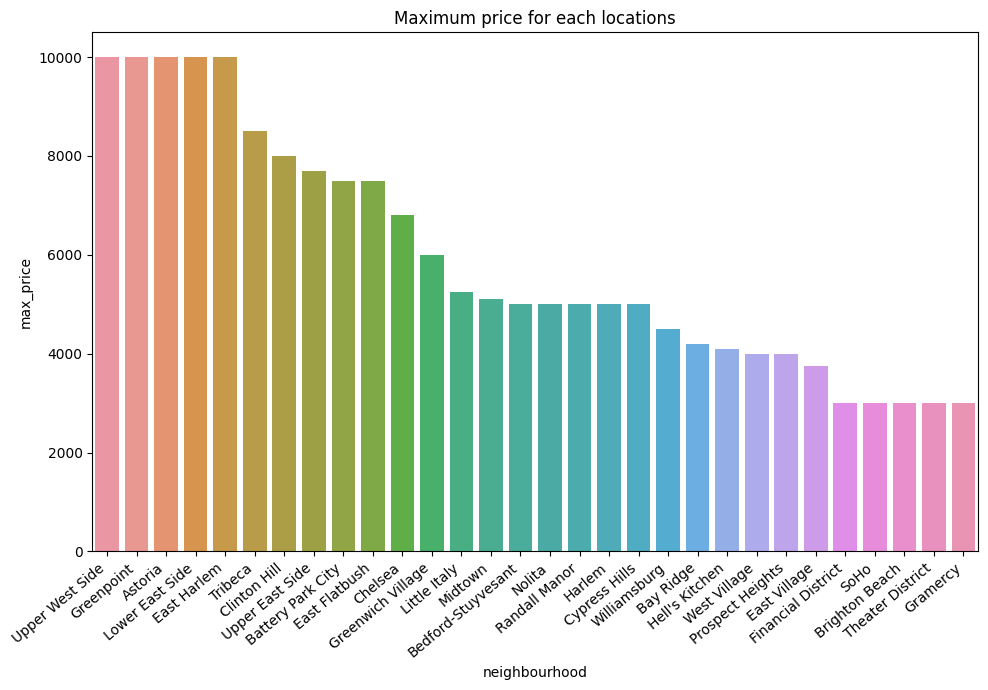

In [30]:
#Obtaining a dataframe that shows us the maximum price for each location.(Top 30 with highest price)
max_price_per_location = AirBnb_df.groupby('neighbourhood')['price'].max().reset_index().sort_values(['price'],ascending=False).rename(columns={'price':'max_price'}).head(30)
plt.figure(figsize=(10,7))
ax = sns.barplot(data=max_price_per_location,x='neighbourhood',y='max_price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Maximum price for each locations")
plt.tight_layout()
plt.show()

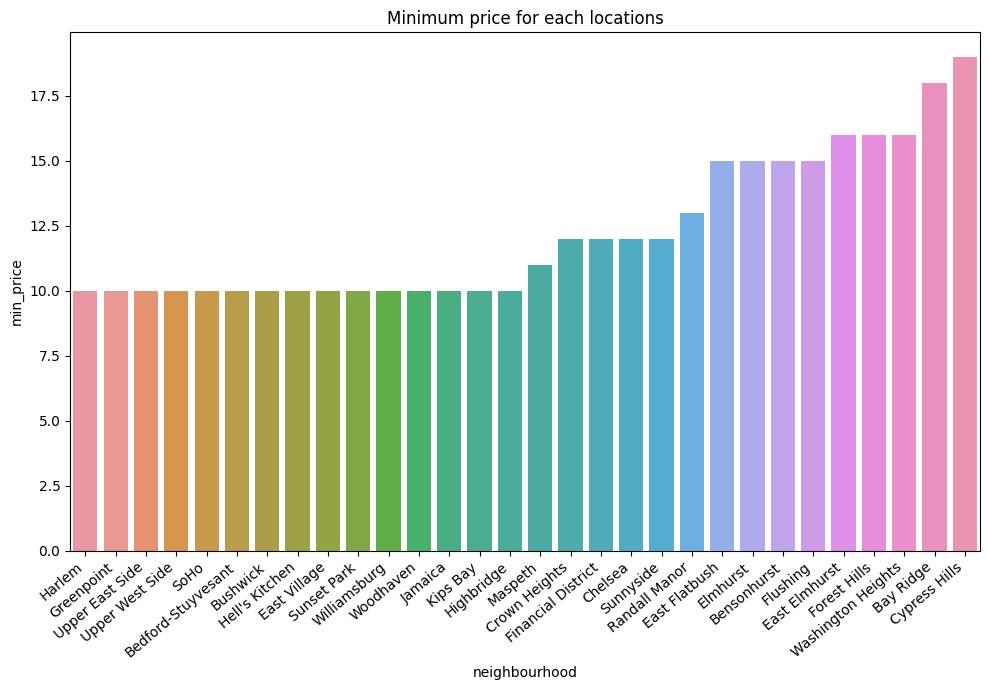

In [31]:
#Obtaining a dataframe that shows us the minimum price for each location.(Top 30 with lowest price)
min_price_per_location = AirBnb_df.groupby('neighbourhood')['price'].min().reset_index().sort_values(['price'],ascending=True).rename(columns={'price':'min_price'}).head(30)
plt.figure(figsize=(10,7))
ax = sns.barplot(data=min_price_per_location,x='neighbourhood',y='min_price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Minimum price for each locations")
plt.tight_layout()
plt.show()

In [32]:
#Printing the top 5 neighbourhoods with highest rent
print("The neighbourhoods with the highest rents are:")
for i in range(5):
  print(i+1,'.', max_price_per_location.iloc[i]['neighbourhood'],'with a price of:',max_price_per_location.iloc[i]['max_price'])


The neighbourhoods with the highest rents are:
1 . Upper West Side with a price of: 10000.0
2 . Greenpoint with a price of: 10000.0
3 . Astoria with a price of: 10000.0
4 . Lower East Side with a price of: 9999.0
5 . East Harlem with a price of: 9999.0


In [33]:
#Printing the top 5 neighbourhoods with lowest rent
print("The neighbourhoods with the lowest rents are:")
for i in range(5):
  print(i+1,'.', min_price_per_location.iloc[i]['neighbourhood'],'with a price of:',min_price_per_location.iloc[i]['min_price'])

The neighbourhoods with the lowest rents are:
1 . Harlem with a price of: 10.0
2 . Greenpoint with a price of: 10.0
3 . Upper East Side with a price of: 10.0
4 . Upper West Side with a price of: 10.0
5 . SoHo with a price of: 10.0


In the comparison between neighborhoods based on rent, two areas—Upper West Side and Greenpoint—stand out notably as they appear in both the lists for highest and lowest rent. This suggests a considerable variability or fluctuation in prices within these specific regions. This fluctuation could potentially be influenced by various factors such as the type of housing available or the specific sub-districts within these areas.

#<b/>Question 3: Top 5 highest listing areas/locations.
ANSWER:</b>

In [37]:
#Creating a dataframe with areas having the highest number of listings
highest_listing_areas = AirBnb_df.groupby('neighbourhood')['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count',ascending=False).head(10)


In [38]:
#A glimpse of what the dataframe with locations which have highest listings looks like
highest_listing_areas

,neighbourhood,calculated_host_listings_count
73,Financial District,85454
137,Murray Hill,26125
95,Hell's Kitchen,25159
127,Midtown,25019
191,Theater District,18704
34,Chelsea,18097
201,Upper East Side,16281
202,Upper West Side,13357
13,Bedford-Stuyvesant,9687
197,Tribeca,7606


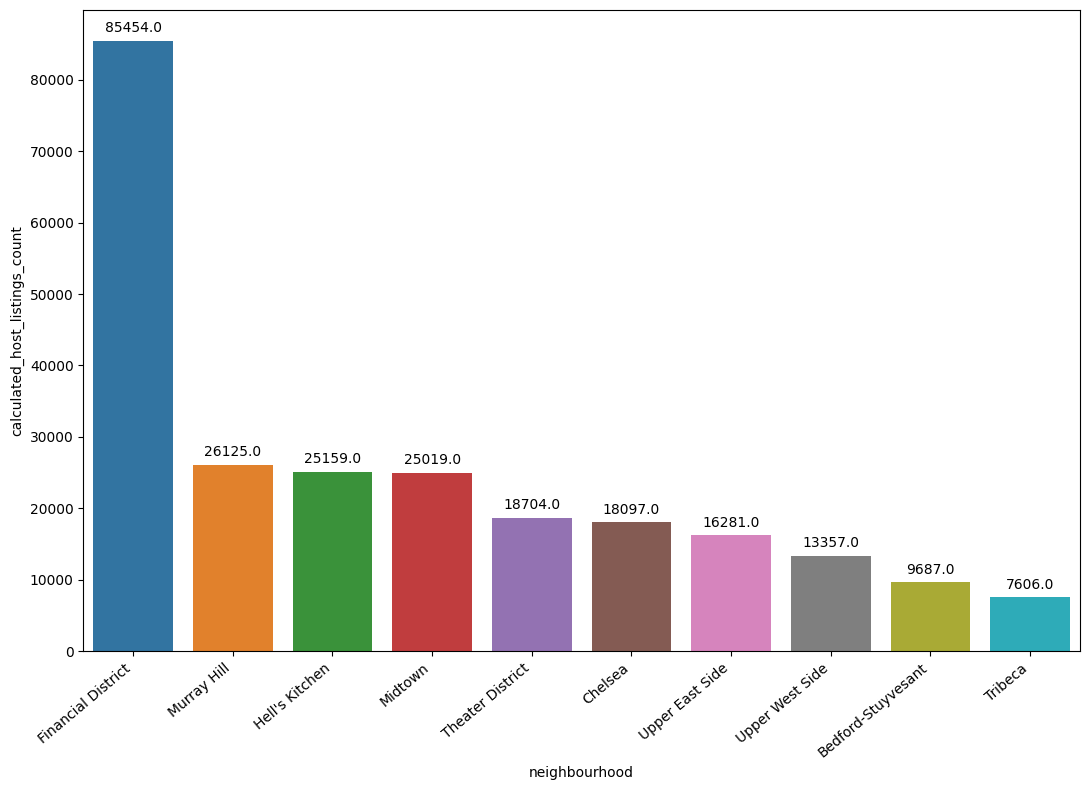

In [39]:
#Creating a visualization for loctions with highest listing
ax = sns.barplot(data=highest_listing_areas,x='neighbourhood',y='calculated_host_listings_count')
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.1f'),
                   (a.get_x() + a.get_width() / 2., a.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [40]:
#Printing the top 5 highest listing areas
print("The top 5 highest listed areas are:")
for i in range(5):
  print(i+1,'.', highest_listing_areas.iloc[i]['neighbourhood'],'with ',highest_listing_areas.iloc[i]['calculated_host_listings_count'],' number of listings')


The top 5 highest listed areas are:
1 . Financial District with  85454  number of listings
2 . Murray Hill with  26125  number of listings
3 . Hell's Kitchen with  25159  number of listings
4 . Midtown with  25019  number of listings
5 . Theater District with  18704  number of listings


By employing straightforward group-by operations, we effortlessly identified the top five areas boasting the highest number of property listings.

#<b/>4) Total Listing/Property count in Each Neighborhood Group using Count plot</b>

<B/>ANSWER</B>

In [41]:
# Count the number of listings in each neighborhood group and store the result in a Pandas series
counts = AirBnb_df['neighbourhood_group'].value_counts()

# Reset the index of the series so that the neighborhood groups become columns in the resulting dataframe
Top_Neighborhood_group = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhood_group

,Neighborhood_Groups,Listing_Counts
0,Manhattan,21643
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1089
4,Staten Island,373


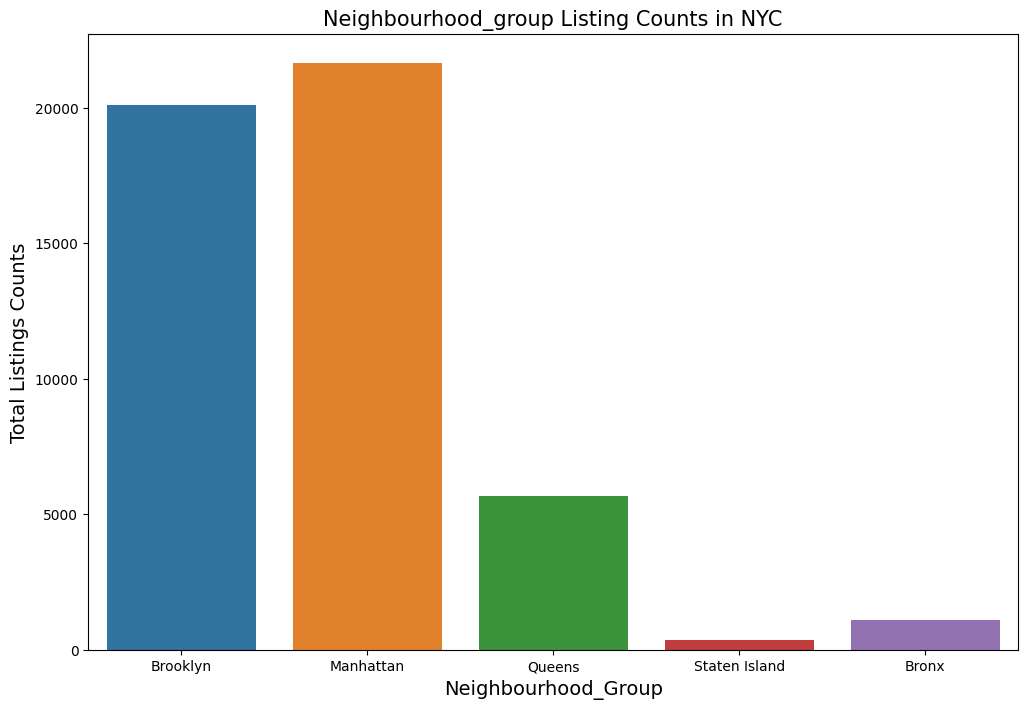

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a countplot of the neighbourhood group data
sns.countplot(data=AirBnb_df, x='neighbourhood_group')

# Set the title of the plot
plt.title('Neighbourhood_group Listing Counts in NYC', fontsize=15)

# Set the x-axis label
plt.xlabel('Neighbourhood_Group', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listings Counts', fontsize=14)

# Show the plot
plt.show()


* Manhattan and Brooklyn have the highest number of listings on Airbnb, with over 19,000 listings each.

* Queens and the Bronx have significantly fewer listings compared to Manhattan and Brooklyn, with 5,567 and 1,070 listings, respectively

* Staten Island has the fewest number of listings, with only 365.

* The distribution of listings across the different neighborhood groups is skewed, with a concentration of listings in Manhattan and Brooklyn.

* Despite being larger in size, the neighborhoods in Queens, the Bronx, and Staten Island have fewer listings on Airbnb compared to Manhattan, which has a smaller geographical area.

* This could suggest that the demand for Airbnb rentals is higher in Manhattan compared to the other neighborhoods, leading to a higher concentration of listings in this area.

* Alternatively, it could be that the supply of listings is higher in Manhattan due to a higher number of homeowners or property owners in this neighborhood who are willing to list their properties on Airbnb.